In [99]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random
from sklearn.metrics import r2_score

In [100]:
fit_test = pd.read_csv('/home/amybirdee/hobby_projects/Dalvir_insanity_fit_test/Insanity calendar.csv', delimiter = ',')

In [101]:
fit_test.head()

,Unnamed: 0,Fit test 1 (17/04/20),Fit test 2 (01/05/20),Fit test 3 (23/05/20),Fit test 4 (09/06/20),Fit test 5 (26/06/20)
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1. Switch kicks,78.0,94.0,108.0,117.0,124.0
2,2. Power jacks,40.0,46.0,48.0,50.0,50.0
3,3. Power knees,70.0,90.0,103.0,100.0,111.0
4,4. Power jumps,37.0,38.0,44.0,55.0,72.0


In [102]:
#delete first row which is blank
fit_test = fit_test.drop([0], axis=0).reset_index(drop = True)

In [103]:
fit_test.head()

,Unnamed: 0,Fit test 1 (17/04/20),Fit test 2 (01/05/20),Fit test 3 (23/05/20),Fit test 4 (09/06/20),Fit test 5 (26/06/20)
0,1. Switch kicks,78.0,94.0,108.0,117.0,124.0
1,2. Power jacks,40.0,46.0,48.0,50.0,50.0
2,3. Power knees,70.0,90.0,103.0,100.0,111.0
3,4. Power jumps,37.0,38.0,44.0,55.0,72.0
4,5. Globe jumps,5.0,9.0,8.0,9.0,9.0


In [104]:
#renaming columns
fit_test.columns = ['exercise', 'fit_test_1', 'fit_test_2', 'fit_test_3', 'fit_test_4', 'fit_test_5']

In [105]:
#renaming the rows - this has created a new index column so need to delete exercise column
fit_test.index = ['Switch kicks', 'Power jacks', 'Power knees', 'Power jumps', 'Globe jumps', 'Suicide jumps', 'Push up jacks', 
                  'Low plank obliques']

In [106]:
#reset_index gets the index column back
fit_test.reset_index()

,index,exercise,fit_test_1,fit_test_2,fit_test_3,fit_test_4,fit_test_5
0,Switch kicks,1. Switch kicks,78.0,94.0,108.0,117.0,124.0
1,Power jacks,2. Power jacks,40.0,46.0,48.0,50.0,50.0
2,Power knees,3. Power knees,70.0,90.0,103.0,100.0,111.0
3,Power jumps,4. Power jumps,37.0,38.0,44.0,55.0,72.0
4,Globe jumps,5. Globe jumps,5.0,9.0,8.0,9.0,9.0
5,Suicide jumps,6. Suicide jumps,11.0,15.0,17.0,18.0,21.0
6,Push up jacks,7. Push up jacks,24.0,30.0,32.0,34.0,36.0
7,Low plank obliques,8. Low plank oblique,35.0,44.0,50.0,53.0,64.0


In [107]:
#deleting exercise column
del fit_test['exercise']

In [142]:
fit_test.reset_index().head()

,index,fit_test_1,fit_test_2,fit_test_3,fit_test_4,fit_test_5
0,Switch kicks,78.0,94.0,108.0,117.0,124.0
1,Power jacks,40.0,46.0,48.0,50.0,50.0
2,Power knees,70.0,90.0,103.0,100.0,111.0
3,Power jumps,37.0,38.0,44.0,55.0,72.0
4,Globe jumps,5.0,9.0,8.0,9.0,9.0


In [140]:
#converting dataframe to list for charts
fit_list = fit_test.values.tolist()
print(fit_list)

[[78.0, 94.0, 108.0, 117.0, 124.0], [40.0, 46.0, 48.0, 50.0, 50.0], [70.0, 90.0, 103.0, 100.0, 111.0], [37.0, 38.0, 44.0, 55.0, 72.0], [5.0, 9.0, 8.0, 9.0, 9.0], [11.0, 15.0, 17.0, 18.0, 21.0], [24.0, 30.0, 32.0, 34.0, 36.0], [35.0, 44.0, 50.0, 53.0, 64.0]]


In [110]:
x = [[1, 2, 3, 4, 5,], [1, 2, 3, 4, 5,], [1, 2, 3, 4, 5,], [1, 2, 3, 4, 5,], [1, 2, 3, 4, 5,], [1, 2, 3, 4, 5,], 
     [1, 2, 3, 4, 5,], [1, 2, 3, 4, 5,]]
y = fit_list

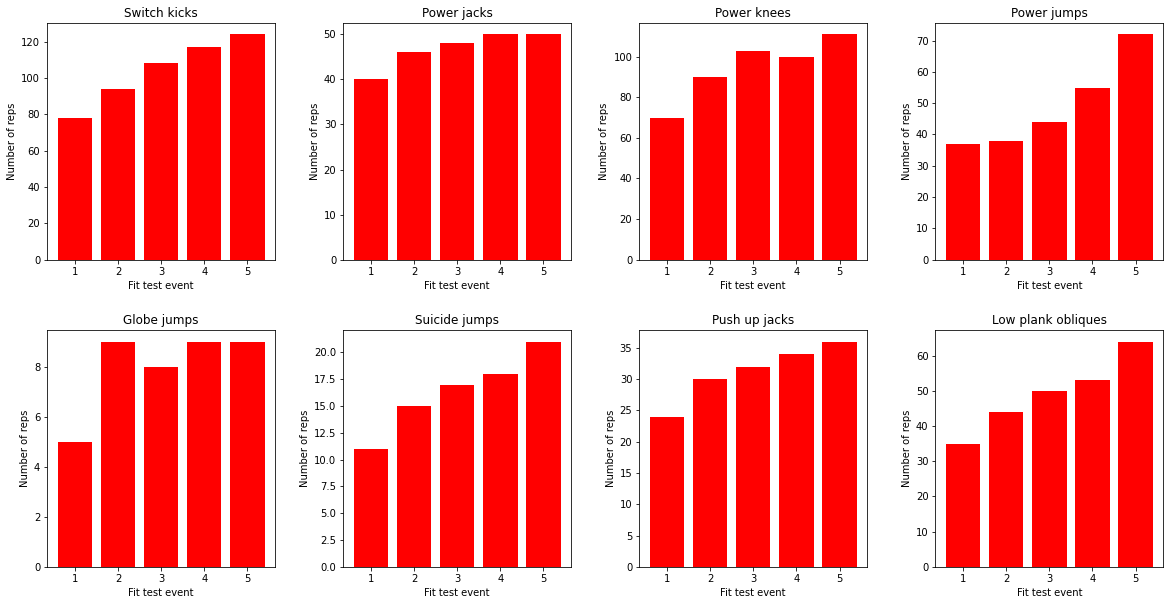

In [124]:
#the first row creates the figure and adds the subplots, axes.ravel() converts a multi-dimensional array into a 
#single dimentional array. Can also use axes.flatten() but axes.ravel() is faster

titles = ['Switch kicks', 'Power jacks', 'Power knees', 'Power jumps', 'Globe jumps', 'Suicide jumps', 'Push up jacks', 
        'Low plank obliques']

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for t, exercise in zip(titles, range(8)):
    ax = axes.ravel()[exercise]
    ax.bar(x[exercise], y[exercise], color = 'red')
    ax.set_xlabel('Fit test event')
    ax.set_ylabel('Number of reps')
    ax.set_title(t)

plt.savefig('dalvir_insanity_fit_test.jpg')

In [112]:
#creating charts showing start and end points
x1 = [['Start', 'End'], ['Start', 'End'], ['Start', 'End'], ['Start', 'End'], ['Start', 'End'], ['Start', 'End'], 
     ['Start', 'End'], ['Start', 'End']]

y1 = [[78, 124], [40, 50], [70, 111], [37, 72], [5, 9], [11, 21], [24, 36], [35, 64]]

titles = ['Switch kicks', 'Power jacks', 'Power knees', 'Power jumps', 'Globe jumps', 'Suicide jumps', 'Push up jacks', 
        'Low plank obliques']

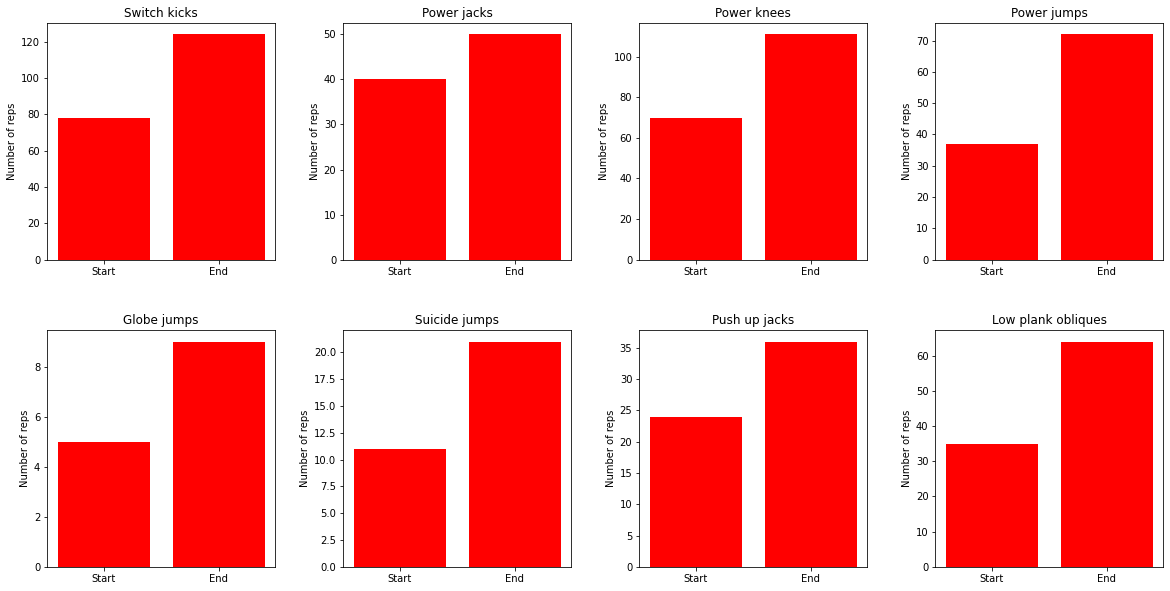

In [126]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for t, exercise in zip(titles, range(8)):
    ax = axes.ravel()[exercise]
    ax.bar(x1[exercise], y1[exercise], color = 'red')
    ax.set_ylabel('Number of reps')
    ax.set_title(t)

plt.savefig('start_end.jpg')

In [114]:
#calculating % increase from start to end
y1 = [[78, 124], [40, 50], [70, 111], [37, 72], [5, 9], [11, 21], [24, 36], [35, 64]]

for reps in y1:
    increase = (reps[1] - reps[0]) / reps[0] *100
    print(increase)

58.97435897435898
25.0
58.57142857142858
94.5945945945946
80.0
90.9090909090909
50.0
82.85714285714286


In [115]:
#not enough values for regression model (predicted values didn't make sense) so generating 20 values from random which are 
#between the max and min of each exercise

sk_sample = random.sample(range(78, 124), 20)
pja_sample = random.sample(range(35, 55), 20)
pk_sample = random.sample(range(70, 111), 20)
pju_sample = random.sample(range(37, 72), 20)
gj_sample = random.sample(range(4, 25), 20)
sj_sample = random.sample(range(10, 30), 20)
puj_sample = random.sample(range(18, 38), 20)
lpo_sample = random.sample(range(35, 64), 20)

In [144]:
#merging orginal and sample lists. Note sample list is a list of tuples - this adds the sample list to the original list
#rather than adding as a list within the sample list

original_list = [[78, 94, 108, 117, 124], [40, 46, 48, 50, 50], [70, 90, 103, 100, 111], 
         [37, 38, 44, 55, 72], [5, 9, 8, 9, 9], [11, 15, 17, 18, 21], 
         [24, 30, 32, 34, 36], [35, 44, 50, 53, 64]]

sample_list = [(sk_sample), (pja_sample), (pk_sample), (pju_sample), (gj_sample), (sj_sample), (puj_sample), (lpo_sample)]

new_list = [original + sample for original, sample in zip(original_list, sample_list)]

print(new_list)

#new list wasn't in order (see below). This code sorts the values of the sublists
new_list_sorted = [sorted(sublist) for sublist in new_list]

print()
print(new_list_sorted)


[[78, 94, 108, 117, 124, 118, 101, 85, 106, 122, 117, 95, 110, 102, 94, 113, 119, 80, 112, 123, 86, 109, 98, 108, 100], [40, 46, 48, 50, 50, 53, 39, 52, 46, 43, 36, 54, 40, 41, 49, 42, 48, 45, 37, 50, 47, 51, 35, 44, 38], [70, 90, 103, 100, 111, 76, 100, 78, 99, 96, 93, 79, 84, 106, 75, 87, 97, 110, 77, 101, 91, 89, 83, 90, 81], [37, 38, 44, 55, 72, 43, 48, 39, 60, 37, 67, 66, 42, 45, 41, 61, 50, 44, 65, 38, 40, 47, 70, 63, 53], [5, 9, 8, 9, 9, 6, 9, 20, 4, 11, 21, 24, 12, 7, 15, 16, 23, 19, 5, 18, 13, 10, 17, 8, 22], [11, 15, 17, 18, 21, 20, 21, 19, 10, 17, 22, 18, 25, 29, 23, 13, 26, 15, 24, 12, 14, 11, 27, 16, 28], [24, 30, 32, 34, 36, 19, 25, 37, 29, 24, 35, 33, 18, 26, 31, 21, 32, 27, 28, 22, 34, 30, 36, 23, 20], [35, 44, 50, 53, 64, 45, 47, 53, 50, 54, 48, 41, 63, 60, 59, 38, 57, 46, 61, 56, 39, 36, 55, 44, 43]]

[[78, 80, 85, 86, 94, 94, 95, 98, 100, 101, 102, 106, 108, 108, 109, 110, 112, 113, 117, 117, 118, 119, 122, 123, 124], [35, 36, 37, 38, 39, 40, 40, 41, 42, 43, 44, 45, 

In [145]:
#for regression, amending x values so they can accept 25 y values from new_list_sorted
x_reg = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 
         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 
         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 
         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 
         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 
         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 
         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]]


y_reg = new_list_sorted

In [146]:
#linear regression model looping through above data
for i in x_reg:
    model = (x_reg, y_reg, 2)
    predict = np.poly1d(model)
    predicted_reps = predict(x_reg)

In [147]:
predicted_reps

array([[   81,   170,   284,   410,   597,   782,  1010,  1298,  1631,
         2012,  2455,  3002,  3603,  4258,  5012,  5858,  6819,  7868,
         9084, 10342, 11741, 13268, 14975, 16778, 18727],
       [   38,    82,   140,   218,   322,   458,   625,   842,  1109,
         1432,  1817,  2270,  2797,  3390,  4082,  4866,  5731,  6716,
         7811,  9002, 10313, 11772, 13365, 15098, 16977],
       [   73,   160,   257,   374,   517,   692,   912,  1178,  1487,
         1872,  2312,  2810,  3369,  4020,  4772,  5634,  6564,  7616,
         8761, 10002, 11384, 12916, 14607, 16466, 18402],
       [   40,    84,   143,   218,   322,   458,   632,   850,  1118,
         1442,  1817,  2270,  2810,  3418,  4127,  4946,  5850,  6914,
         8020,  9262, 10628, 12102, 13710, 15506, 17427],
       [    7,    20,    44,    90,   162,   266,   401,   586,   812,
         1092,  1432,  1850,  2342,  2914,  3572,  4338,  5187,  6140,
         7203,  8382,  9683, 11112, 12675, 14378, 16227],


In [148]:
#predicting future reps
x_future = [[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
            [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 
            [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 
            [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 
            [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 
            [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 
            [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 
            [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]]


y_future = predict(x_future)

In [149]:
#for loop for future reps
for x_fut in x_future:
    model_future = (x_future, y_future, 1)
    predict_future = np.poly1d(model_future)
    future_reps = predict_future(x_future)

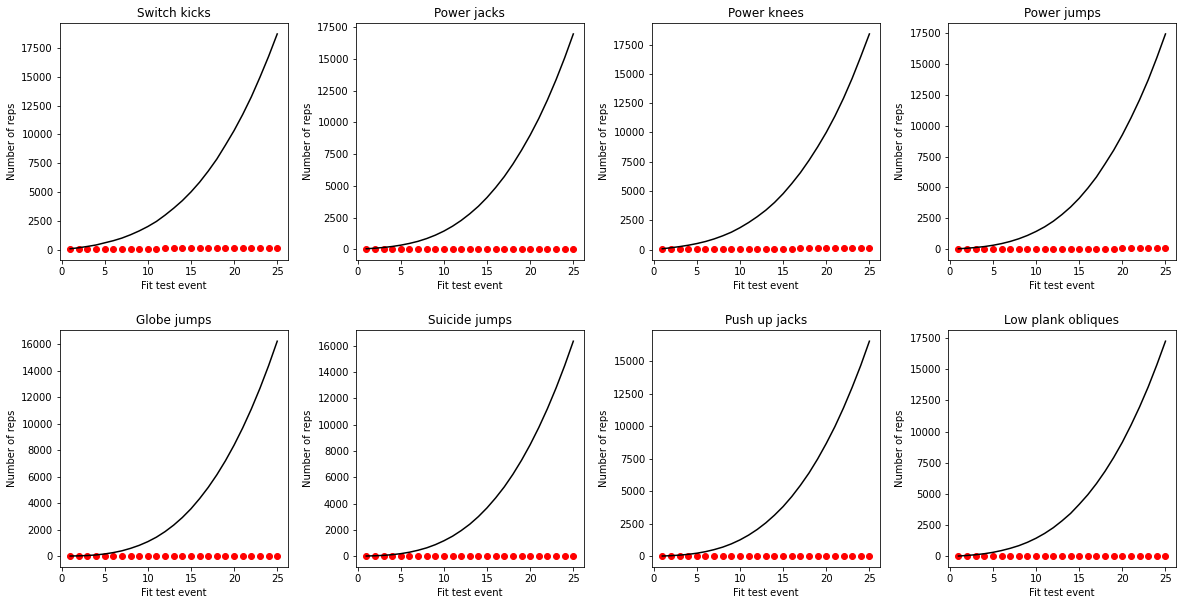

In [150]:
#regression model is giving unrealistic results, likely due to the lack of datapoints

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for t, exercise in zip(titles, range(8)):
    ax = axes.ravel()[exercise]
    ax.scatter(x_reg[exercise], y_reg[exercise], color = 'red')
    ax.plot(x_reg[exercise], predicted_reps[exercise], color = 'black')
    ax.set_xlabel('Fit test event')
    ax.set_ylabel('Number of reps')
    ax.set_title(t)

plt.savefig('regression_charts.jpg')

In [151]:
#R2 score shows model is a bad fit
r2_score(y_reg, predict(x_reg))

-44935.68691011918